In [1]:
import os
import numpy as np
import torch as ch
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from robustness.model_utils import make_and_restore_model
from robustness.tools.vis_tools import show_image_row

from helpers import data_helpers, feature_helpers, decisionlayer_helpers, vis_helpers

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
DATASET_NAME = 'imagenet' 
DATASET_PATH = './datasets/imagenet' # Path to dataset
DATASET_TYPE = 'vision'

MODEL_PATH = f'./models/model_checkpoint.ckpt' # Path to deep network
ARCH = 'resnet50' # Architecture type

# Path to pre-computed deep features and regularization path obtained using main.py (use --cache)
FEATURE_PATH = f'./tmp/imagenet/features'
GLM_PATH = f'./tmp/imagenet/checkpoint'

BATCH_SIZE = 128
NUM_WORKERS = 10

## Load dataset and models

In [3]:
dataset, train_loader, test_loader = data_helpers.load_dataset(DATASET_NAME,
                                                               os.path.expandvars(DATASET_PATH),
                                                               DATASET_TYPE,
                                                               BATCH_SIZE,
                                                               NUM_WORKERS, 
                                                               shuffle=False,
                                                               model_path=MODEL_PATH)
class_dict = data_helpers.get_label_mapping(DATASET_NAME)

==> Preparing dataset imagenet..


In [4]:
model, _ = make_and_restore_model(arch=ARCH, dataset=dataset, resume_path=MODEL_PATH)
model.eval()
model.cuda()
pass

=> loading checkpoint '/data/theory/robustopt/robust_models/transfer_models/resnet50_l2_eps3.ckpt'
=> loaded checkpoint '/data/theory/robustopt/robust_models/transfer_models/resnet50_l2_eps3.ckpt' (epoch 90)


In [5]:
test_images, test_labels = [], []
for _, (im, label) in tqdm(enumerate(test_loader), total=len(test_loader)):
    test_images.append(im)
    test_labels.append(label)
test_images, test_labels = ch.cat(test_images), ch.cat(test_labels).numpy()

100%|██████████| 391/391 [01:27<00:00,  4.46it/s]


## Load pre-computed deep features (see main.py)

In [6]:
features, feature_mean, feature_std = feature_helpers.load_features_mode(FEATURE_PATH, mode='test',
                                                                         batch_size=BATCH_SIZE,
                                                                         num_workers=NUM_WORKERS)

==> loaded 3 files of representations...


100%|██████████| 391/391 [00:01<00:00, 335.80it/s]


In [7]:
maximal_idx = np.argmax(features, axis=0)

## Load regularization path

In [8]:
glm_res = decisionlayer_helpers.load_glm(GLM_PATH)

Loading regularization path of length 100


### Visualize sparsity-accuracy trade-off

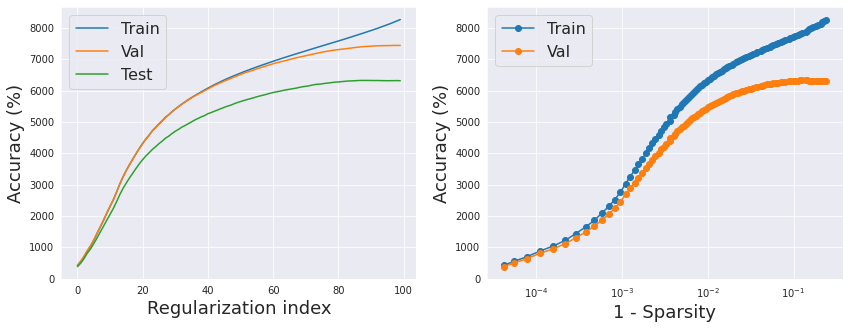

In [9]:
vis_helpers.plot_sparsity(glm_res)

### Select a single sparse model

In [10]:
CRITERION = 'absolute'
FACTOR = 5

glm_res = decisionlayer_helpers.select_sparse_model(glm_res,
                                                   selection_criterion=CRITERION,
                                                   factor=FACTOR)

Test accuracy | Best:  63.24, Sparse: 60.03 Sparsity: 54.35


## Feature visualization

We can now compare the deep features used by the dense and sparse decision layers for a set of randomly chosen classes. 

Note that the feature interpretations (feature visualization and LIME) are constructed accounting for the sign of the weight assigned to a deep feature. In other words, if the weight assigned to a deep feature is positive (negative), the feature interpretation presented below denotes input patterns that are cause the feature to be most positive (negative).

In [11]:
Nclasses = glm_res['weight_sparse'].shape[0]
Nplot = 5
Nfeatures = 5
FEATURE_SEL = 'rand'
MODE = 'pos' # Visualize top-k weights in actual value ('pos') or magnitude ('all')
WT_THRESH = 1e-3 # Ignore very small weights

rng = np.random.RandomState(0)

  0%|          | 0/512 [00:00<?, ?it/s]/mnt/nfs/home/shibani/conda_envs/basic/lib/python3.8/site-packages/kornia/geometry/transform/imgwarp.py:186: UserWarning: The align_corners default value has been changed. By default now is set True in order to match cv2.warpAffine. In case you want to keep your previous behaviour set it to False. This warning will disappear in kornia > v0.6.
  warnings.warn(message)
100%|██████████| 512/512 [01:09<00:00,  7.37it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

---Class: ocarina, sweet potato---


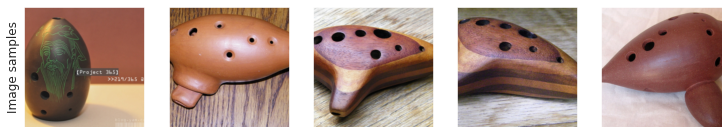

--Dense model--
Number of features used for this class: 236


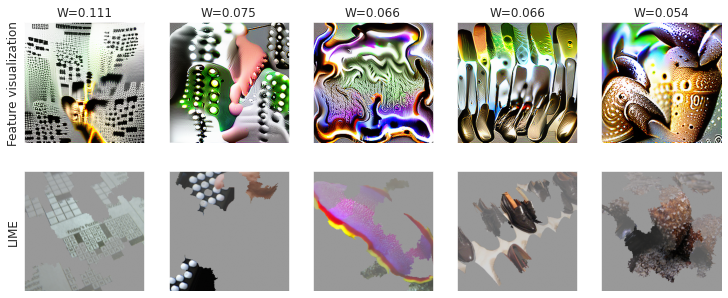

--Sparse model--
Number of features used for this class: 69


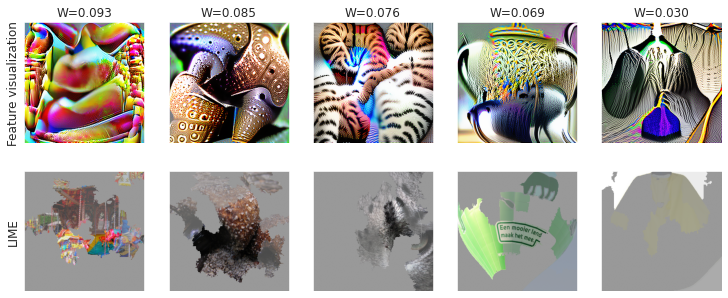

  0%|          | 0/512 [00:00<?, ?it/s]/mnt/nfs/home/shibani/conda_envs/basic/lib/python3.8/site-packages/kornia/geometry/transform/imgwarp.py:186: UserWarning: The align_corners default value has been changed. By default now is set True in order to match cv2.warpAffine. In case you want to keep your previous behaviour set it to False. This warning will disappear in kornia > v0.6.
  warnings.warn(message)
100%|██████████| 512/512 [01:09<00:00,  7.33it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

---Class: combination lock---


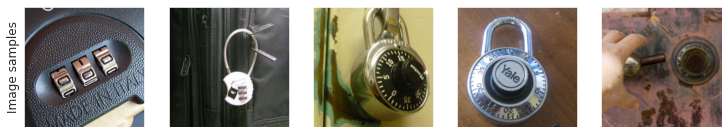

--Dense model--
Number of features used for this class: 302


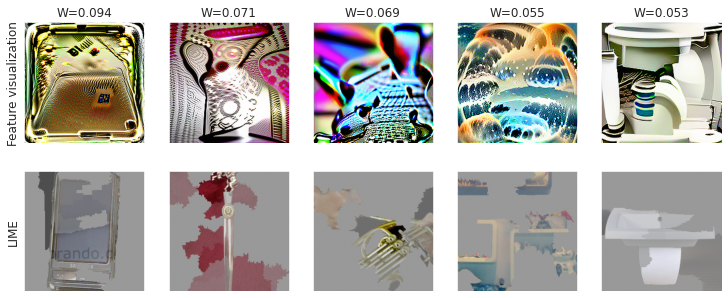

--Sparse model--
Number of features used for this class: 72


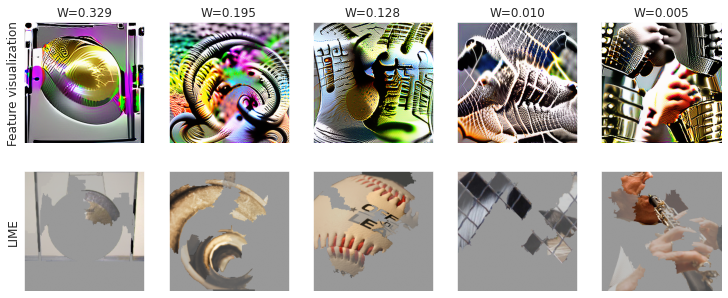

  0%|          | 0/512 [00:00<?, ?it/s]/mnt/nfs/home/shibani/conda_envs/basic/lib/python3.8/site-packages/kornia/geometry/transform/imgwarp.py:186: UserWarning: The align_corners default value has been changed. By default now is set True in order to match cv2.warpAffine. In case you want to keep your previous behaviour set it to False. This warning will disappear in kornia > v0.6.
  warnings.warn(message)
100%|██████████| 512/512 [01:10<00:00,  7.21it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

---Class: stopwatch, stop watch---


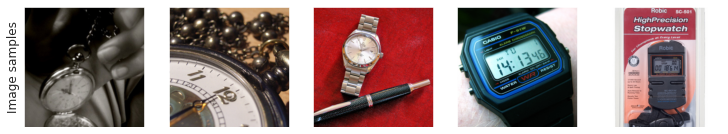

--Dense model--
Number of features used for this class: 229


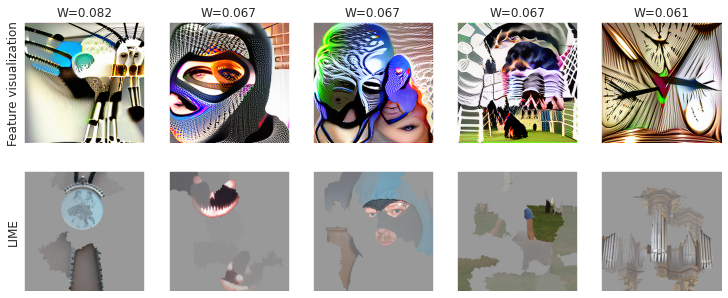

--Sparse model--
Number of features used for this class: 51


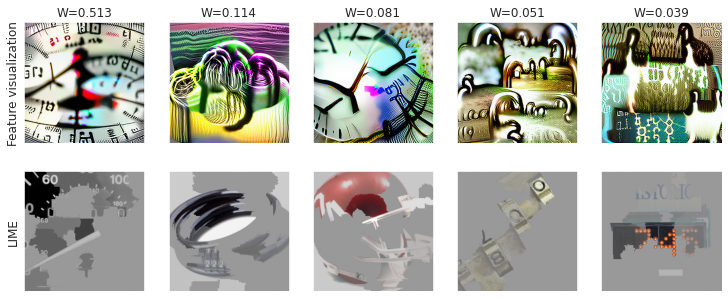

  0%|          | 0/512 [00:00<?, ?it/s]/mnt/nfs/home/shibani/conda_envs/basic/lib/python3.8/site-packages/kornia/geometry/transform/imgwarp.py:186: UserWarning: The align_corners default value has been changed. By default now is set True in order to match cv2.warpAffine. In case you want to keep your previous behaviour set it to False. This warning will disappear in kornia > v0.6.
  warnings.warn(message)
100%|██████████| 512/512 [01:10<00:00,  7.28it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

---Class: stove---


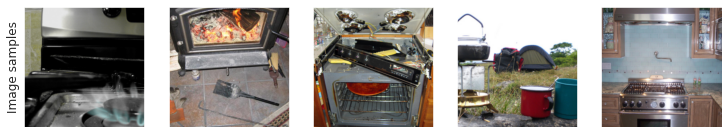

--Dense model--
Number of features used for this class: 279


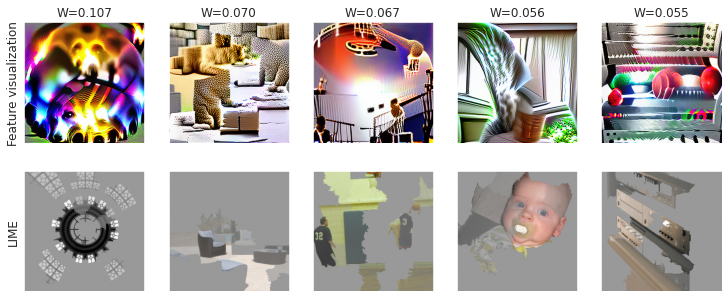

--Sparse model--
Number of features used for this class: 61


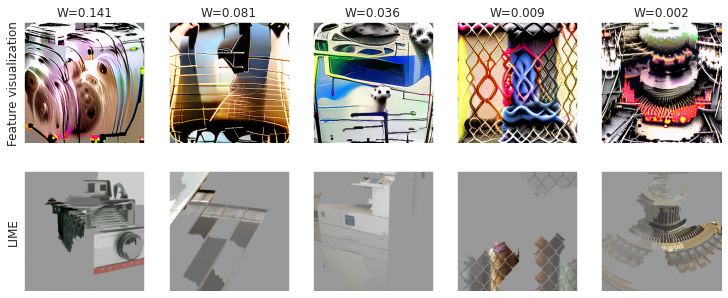

  0%|          | 0/512 [00:00<?, ?it/s]/mnt/nfs/home/shibani/conda_envs/basic/lib/python3.8/site-packages/kornia/geometry/transform/imgwarp.py:186: UserWarning: The align_corners default value has been changed. By default now is set True in order to match cv2.warpAffine. In case you want to keep your previous behaviour set it to False. This warning will disappear in kornia > v0.6.
  warnings.warn(message)
100%|██████████| 512/512 [01:12<00:00,  7.08it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

---Class: lens cap, lens cover---


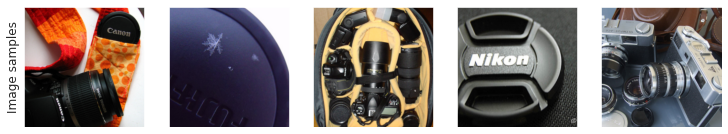

--Dense model--
Number of features used for this class: 212


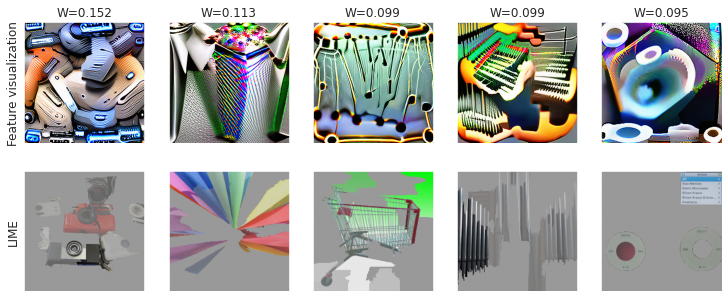

--Sparse model--
Number of features used for this class: 36


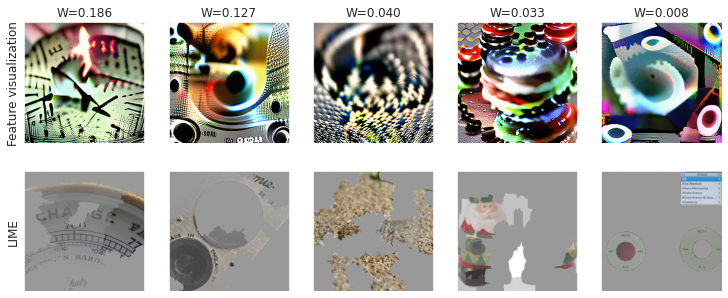

In [12]:
for pi in range(Nplot):
    pc = rng.choice(Nclasses, 1)[0]
    feature_indices, signs, weights, Nfs = [], [], [], []
    for weight_type in ['sparse', 'dense']:

        # Find top-k features, where k=#features used by sparse model 
        weight_class = vis_helpers.normalize_weight(glm_res[f'weight_{weight_type}'][pc])

        if MODE == 'all':
            rel_idx = np.where(np.abs(weight_class) > WT_THRESH)[0]
        else:
            rel_idx = np.where(weight_class > WT_THRESH)[0]

        if weight_type == 'sparse':
            Nf = len(rel_idx)

        if MODE == 'all':
            largest_features = rel_idx[np.argsort(-np.abs(weight_class[rel_idx]))]
        else:
            largest_features = rel_idx[np.argsort(-weight_class[rel_idx])]


        # Plot Nplot randomly-chosen ones
        feature_idx = rng.choice(largest_features[:Nf], Nfeatures, replace=False)        
        feature_idx = feature_idx[np.argsort(-weight_class[feature_idx])]

        for x, y in zip([feature_indices, signs, weights, Nfs],
                        [feature_idx, np.sign(weight_class[feature_idx]), 
                         weight_class[feature_idx], len(rel_idx)]):
            x.append(y)

    # Figure out how to do fv and lime efficiently

    feature_indices, signs = np.concatenate(feature_indices), np.concatenate(signs)
    img_indices = maximal_idx[feature_indices]

    feature_vis = vis_helpers.get_feature_visualization(model, 
                                                        feature_indices, 
                                                        signs)
    lime_exp = vis_helpers.get_lime_explanation(model, 
                                   feature_indices,
                                   signs,
                                   test_images[img_indices].double(), 
                                   feature_mean, feature_std,
                                   NLime=10,
                                   background_color=0.6)
    
    print(f"---Class: {class_dict[pc]}---")
    class_idx = rng.choice(np.where(test_labels == pc)[0], Nfeatures, replace=False)
    show_image_row([test_images[class_idx]], 
                       ['Image samples']) 

    for idx, model_type, Nf in zip([np.arange(Nfeatures,2*Nfeatures), np.arange(Nfeatures)],
                               ['Dense', 'Sparse'],
                                Nfs[::-1]):

        print(f'--{model_type} model--')
        print(f'Number of features used for this class: {Nf}')
        show_image_row([feature_vis[idx], lime_exp[idx]], 
                       ['Feature visualization', 'LIME'],
                       tlist=[[f"W={w:.3f}" for w in np.concatenate(weights)[idx]],
                              ["" for _ in range(Nfeatures)]]) 
